In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [109]:
# The dataset is taken from https://www.kaggle.com/datasets/yasserh/titanic-dataset
data = pd.read_csv("Titanic-Dataset.csv")
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [110]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [111]:
df = data.drop(["Name", "PassengerId", "Ticket", "Cabin"], axis=1)

In [112]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [113]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="most_frequent",)

df = pd.DataFrame(imp.fit_transform(df), columns=df.columns)

In [114]:
X = df.drop(["Survived"], axis=1)
y = df["Survived"]

In [126]:
X.Sex = X.Sex.replace({"male": 0, "female": 1})
X.Embarked = X.Embarked.replace({"S": 0, "C": 1, "Q": 2})

In [127]:
y = y.astype("int")

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [129]:
model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [130]:
y_pred = model.predict(X_test)

In [131]:
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{cm}')
print(f'Classification Report:\n{cr}')

Accuracy: 0.7988826815642458
Confusion Matrix:
[[92 13]
 [23 51]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [140]:
cols = X_train.columns

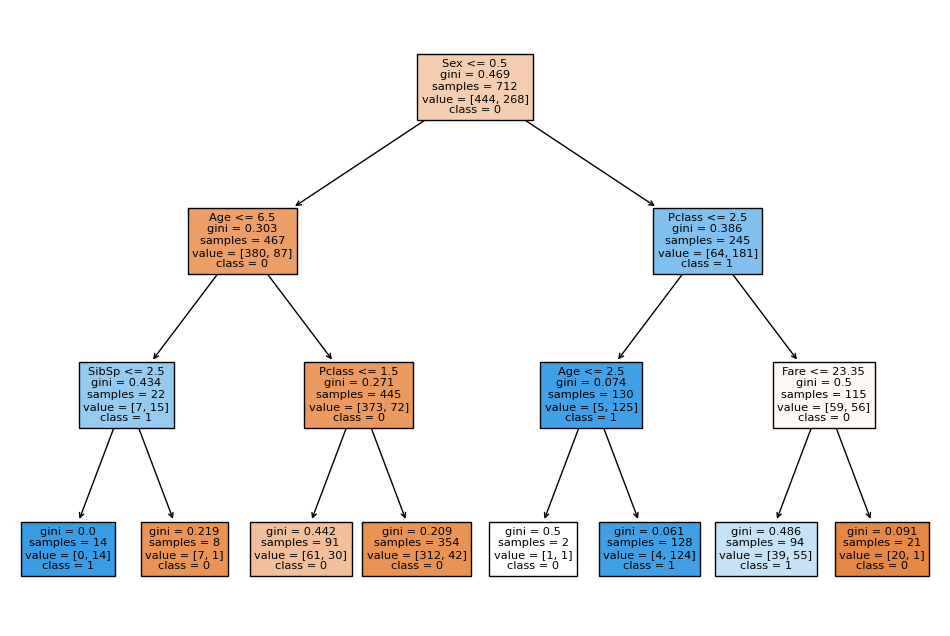

In [144]:
import matplotlib.pyplot as plt
import sklearn.tree as tree

plt.figure(figsize=(12,8))
tree.plot_tree(model, filled=True, feature_names=X.columns, class_names=["0","1"])
plt.show()

In [145]:
clf = DecisionTreeClassifier(random_state=1)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [146]:
y_pred = clf.predict(X_test)

In [147]:
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{cm}')
print(f'Classification Report:\n{cr}')

Accuracy: 0.7653631284916201
Confusion Matrix:
[[84 21]
 [21 53]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       105
           1       0.72      0.72      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



In [148]:
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas  # Extract different values of alpha
impurities = path.impurities

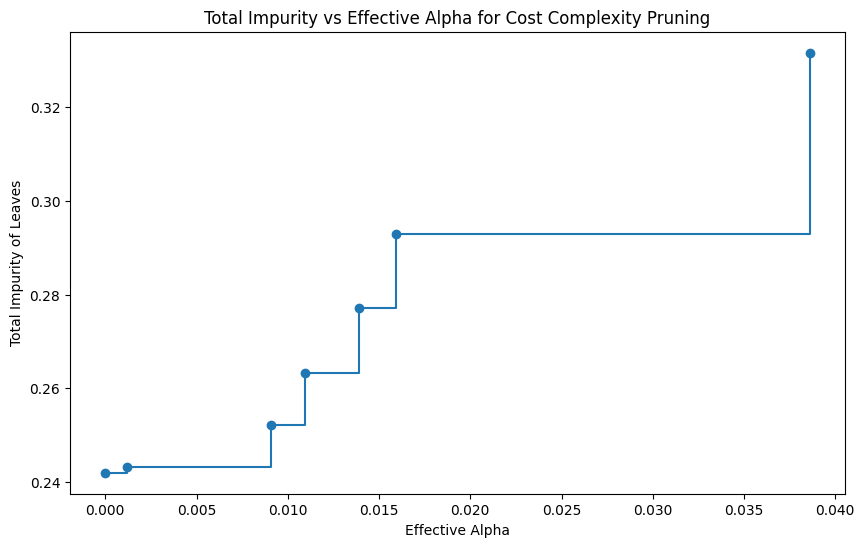

In [149]:
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
plt.xlabel("Effective Alpha")
plt.ylabel("Total Impurity of Leaves")
plt.title("Total Impurity vs Effective Alpha for Cost Complexity Pruning")
plt.show()

In [150]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

In [151]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

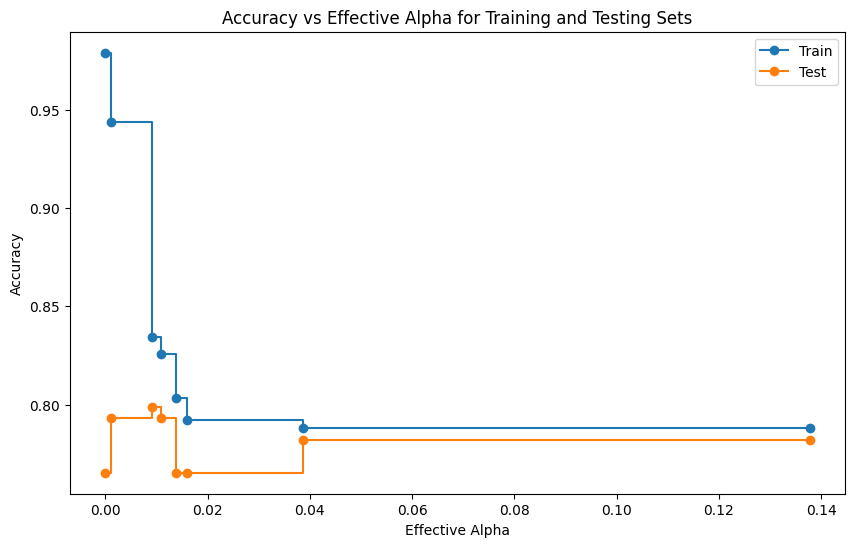

In [158]:
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, marker='o', label="Train", drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker='o', label="Test", drawstyle="steps-post")
# plt.axvline(0.013, color="red")
plt.xlabel("Effective Alpha")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy vs Effective Alpha for Training and Testing Sets")
plt.show()

In [159]:
best_alpha = ccp_alphas[np.argmax(test_scores)]
print(f"Best Alpha: {best_alpha}")
best_clf = DecisionTreeClassifier(random_state=1, ccp_alpha=best_alpha)
best_clf.fit(X_train, y_train)

Best Alpha: 0.009055400380113265


DecisionTreeClassifier(ccp_alpha=0.009055400380113265, random_state=1)

In [160]:
y_pred_pruned = best_clf.predict(X_test)

In [162]:
before_accuracy = accuracy_score(y_test, y_pred)
after_accuracy = accuracy_score(y_test, y_pred_pruned)
cm = confusion_matrix(y_test, y_pred_pruned)
cr = classification_report(y_test, y_pred_pruned)

print(f'Before Pruned Accuracy: {before_accuracy}')
print(f'After Pruned Accuracy: {after_accuracy}')
print(f'Confusion Matrix:\n{cm}')
print(f'Classification Report:\n{cr}')

Before Pruned Accuracy: 0.7653631284916201
After Pruned Accuracy: 0.7988826815642458
Confusion Matrix:
[[92 13]
 [23 51]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



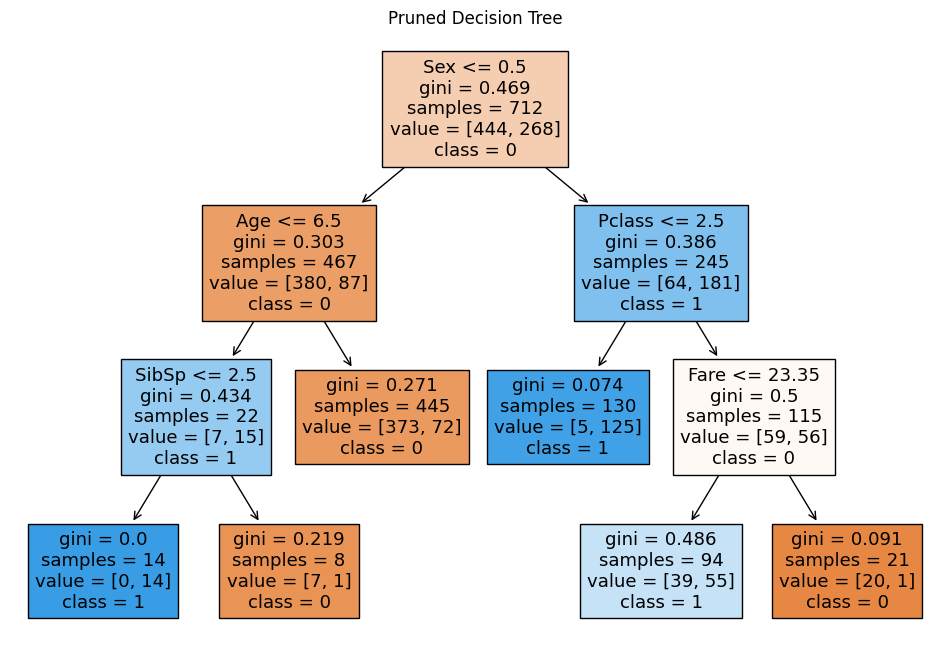

In [165]:
plt.figure(figsize=(12, 8))
tree.plot_tree(best_clf, filled=True, feature_names=X.columns, class_names=["0", "1"])
plt.title("Pruned Decision Tree")
plt.show()